In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv("tested.csv")

# DATA PREPROCESSING.

.Load the data using the pandas read funstion.

.Print the dataset information.


.Print the stastics about the using describe function.

.Print the stastics about the using describe function.


.Visualize the correlation map to understand the correlation with the columns.


.check for null values, and if the data contains any, remove them.


.Additionall, inspect for duplicate value and remove them if pesent.

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.shape

(418, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
data.describe().style.background_gradient(cmap="tab20c")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<AxesSubplot:>

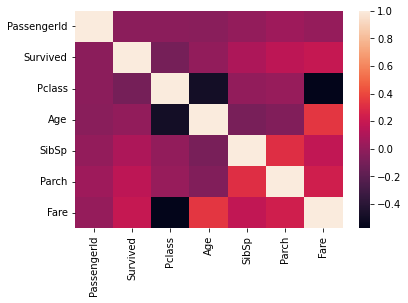

In [7]:
sns.heatmap(data.corr())

In [8]:
data_dup=data.duplicated().sum()
print("The dataset no duplicated values",data_dup)

The dataset no duplicated values 0


<AxesSubplot:>

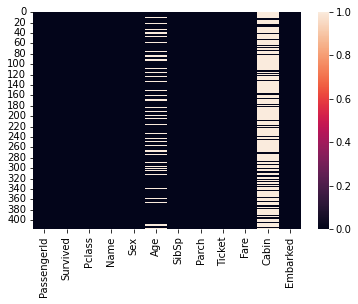

In [9]:
sns.heatmap(data.isnull())

In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
data_cabin=data["Cabin"].isnull().sum()/len(data["Cabin"])*100
print(data_cabin)
print("The dataset given the colums Cabin 78-79% null values very difficult the null values fill so drop the Cabin columns")

78.22966507177034
The dataset given the colums Cabin 78-79% null values very difficult the null values fill so drop the Cabin columns


In [12]:
data.drop(["Cabin"],axis=1,inplace=True)

In [13]:
data_fare=data["Fare"].isnull().sum()/len(data["Fare"])*100
print(data_fare)
print("The dataset given the columns 0.23% null values very easily the fill null values")

0.23923444976076555
The dataset given the columns 0.23% null values very easily the fill null values


The Fare columns maximum outlier


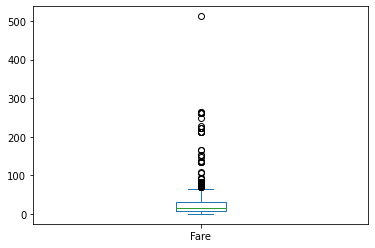

In [14]:
data["Fare"].plot(kind="box")
print("The Fare columns maximum outlier")

In [15]:
print("The Fare colums null values given Pclass is 3 so check the pclass 3 and find the mean or median Fare values")
data[data["Fare"].isnull()]

The Fare colums null values given Pclass is 3 so check the pclass 3 and find the mean or median Fare values


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


The pclass 3 given colunms fare values the maximum outlier so help the median fill the null values the fare columns


7.8958

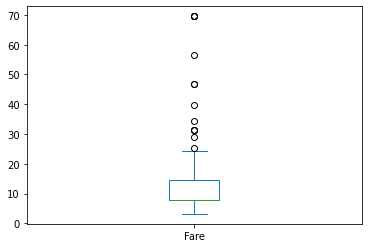

In [16]:
print("The pclass 3 given colunms fare values the maximum outlier so help the median fill the null values the fare columns")
data.groupby("Pclass").get_group(3)["Fare"].plot(kind="box")
data_median=data.groupby("Pclass").get_group(3)["Fare"].median()
data_median

In [17]:
data["Fare"].fillna(data_median,inplace=True)

In [18]:
print("check the missing values repeat")
data["Fare"].isnull().sum()

check the missing values repeat


0

In [19]:
print("The dataset given the columns Age is 20% null values and 80% data required so no drop fill the null values")
data["Age"].isnull().sum()/len(data["Age"])*100

The dataset given the columns Age is 20% null values and 80% data required so no drop fill the null values


20.574162679425836

The Age columns given values minimun outlier


<AxesSubplot:>

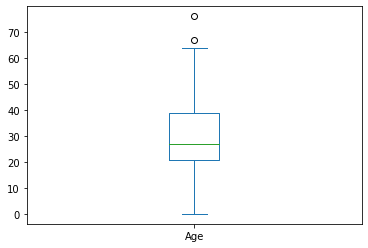

In [20]:
print("The Age columns given values minimun outlier")
data["Age"].plot(kind="box")

The Age columns is normalited distributed so standard normal distribution follow 67-68% data
       lie between the mean - standard derivation and the mean + standard derivation


/Users/ahsan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


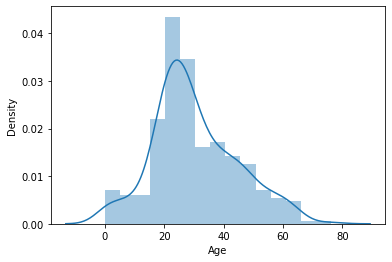

In [21]:
print("""The Age columns is normalited distributed so standard normal distribution follow 67-68% data
       lie between the mean - standard derivation and the mean + standard derivation""")
sns.distplot(data["Age"])
plt.show()

In [22]:
print("""The 86 random number generate given the age colums between  the mean - standard derivation and 
      the mean + standard derivation""")
data_random=np.random.randint(data["Age"].mean()-data["Age"].std(),data["Age"].mean()+data["Age"].std(),86)
data_random

The 86 random number generate given the age colums between  the mean - standard derivation and 
      the mean + standard derivation


array([17, 19, 20, 20, 41, 18, 26, 27, 23, 43, 25, 23, 40, 32, 35, 35, 30,
       37, 39, 40, 29, 21, 17, 21, 35, 20, 23, 33, 28, 38, 42, 21, 28, 28,
       19, 18, 22, 32, 22, 40, 27, 24, 40, 16, 33, 37, 30, 22, 32, 31, 39,
       22, 33, 33, 29, 24, 33, 35, 33, 21, 23, 39, 33, 30, 37, 24, 34, 40,
       41, 27, 25, 17, 22, 19, 36, 38, 28, 21, 24, 20, 39, 20, 20, 34, 22,
       41])

In [23]:
print("Fill the null values the given columns Age")
data["Age"][data["Age"].isnull()]=data_random

Fill the null values the given columns Age


/var/folders/10/bhjzcp3551b5st2q9rth561h0000gn/T/ipykernel_3163/579225690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"][data["Age"].isnull()]=data_random


In [24]:
print("check the missing values repeat")
data["Age"].isnull().sum()

check the missing values repeat


0

<AxesSubplot:>

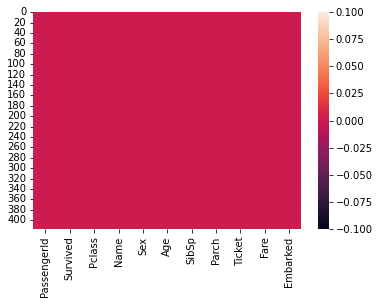

In [25]:
sns.heatmap(data.isnull())

In [26]:
print("""The Survived is relation the required columns given the dataset check one by one so help 
         the model and predict the Survived or not""")
data.corr()

The Survived is relation the required columns given the dataset check one by one so help 
         the model and predict the Survived or not


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.024813,0.003818,0.043080,0.008764
Survived,-0.023245,1.000000,-0.108615,-0.006882,0.099943,0.159120,0.192225
Pclass,-0.026751,-0.108615,1.000000,-0.437225,0.001087,0.018721,-0.577488
Age,-0.024813,-0.006882,-0.437225,1.000000,-0.070445,-0.057611,0.317493
SibSp,0.003818,0.099943,0.001087,-0.070445,1.000000,0.306895,0.172031
Parch,0.043080,0.159120,0.018721,-0.057611,0.306895,1.000000,0.230409
Fare,0.008764,0.192225,-0.577488,0.317493,0.172031,0.230409,1.000000


In [27]:
print("""The given columns Survived is week corr relation with PassengerId no effect the Survived so 
      the drop the PassengerId columns""")
data.drop(["PassengerId"],axis=1,inplace=True)

The given columns Survived is week corr relation with PassengerId no effect the Survived so 
      the drop the PassengerId columns


The Survived columns is relation to pclass columns -0.1 so check the effect survived columns among pclass
Pclass  Survived
1       0            57
        1            50
2       0            63
        1            30
3       0           146
        1            72
Name: Survived, dtype: int64
The survived people the given % is
Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64


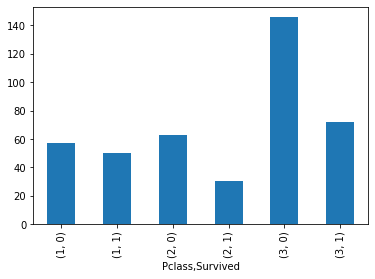

In [28]:
print("The Survived columns is relation to pclass columns -0.1 so check the effect survived columns among pclass")
print(data.groupby("Pclass")["Survived"].value_counts())
print("The survived people the given % is")
print(data.groupby("Pclass")["Survived"].mean()*100)
data.groupby("Pclass")["Survived"].value_counts().plot(kind="bar")
plt.show()

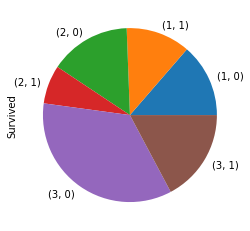

In [29]:
data.groupby("Pclass")["Survived"].value_counts().plot(kind="pie")
plt.show()

In [30]:
print("""The given columns Survived is no relation with Name no effect the Survived so 
      the drop the Name columns""")
data.drop(["Name"],axis=1,inplace=True)

The given columns Survived is no relation with Name no effect the Survived so 
      the drop the Name columns


The Survived columns is relation to Sex columns so check the effect survived columns among pclass
Sex     Survived
female  1           152
male    0           266
Name: Survived, dtype: int64
The survived people the given % is
Sex
female    100.0
male        0.0
Name: Survived, dtype: float64


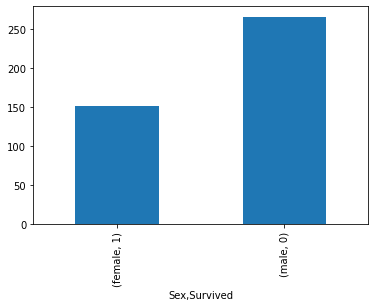

In [31]:
print("The Survived columns is relation to Sex columns so check the effect survived columns among pclass")
print(data.groupby("Sex")["Survived"].value_counts())
print("The survived people the given % is")
print(data.groupby("Sex")["Survived"].mean()*100)
data.groupby("Sex")["Survived"].value_counts().plot(kind="bar")
plt.show()

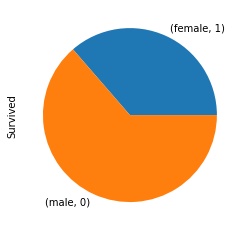

In [32]:
data.groupby("Sex")["Survived"].value_counts().plot(kind="pie")
plt.show()

The Survived columns is relation to Age columns so check the effect survived columns among pclass.
Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object
The first graph show not survived or 2nd graph show survived.


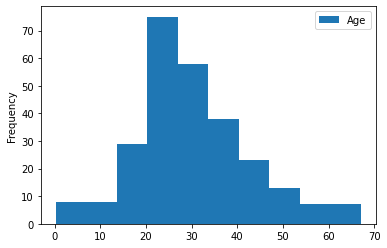

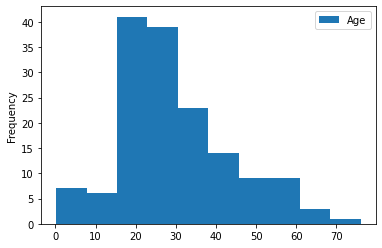

In [33]:
print("The Survived columns is relation to Age columns so check the effect survived columns among pclass.")
print(data.groupby("Survived").plot(kind="hist",y="Age"))
print("The first graph show not survived or 2nd graph show survived.")

/Users/ahsan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ahsan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


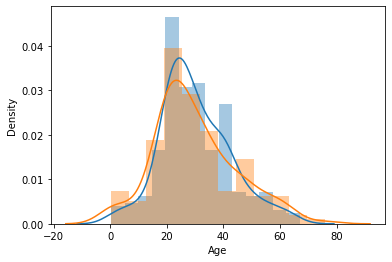

Conclusion:Minimum age are survived as compare to not survived and young age people are survived
        as compare to not survived old age are survived or not survived


In [34]:
sns.distplot(data["Age"][data["Survived"]==0])
sns.distplot(data["Age"][data["Survived"]==1])
plt.show()
print("""Conclusion:Minimum age are survived as compare to not survived and young age people are survived
        as compare to not survived old age are survived or not survived""")

The Survived columns is relation to Sibsp columns so check the effect survived columns among pclass
SibSp  Survived
0      0           195
       1            88
1      0            56
       1            54
2      0             8
       1             6
3      0             3
       1             1
4      0             3
       1             1
5      1             1
8      0             1
       1             1
Name: Survived, dtype: int64
The survived people the given % is
SibSp
0     31.095406
1     49.090909
2     42.857143
3     25.000000
4     25.000000
5    100.000000
8     50.000000
Name: Survived, dtype: float64


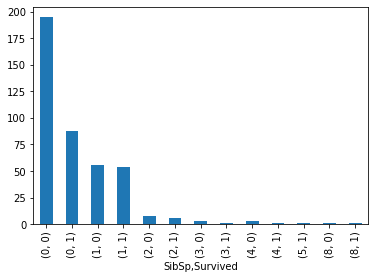

In [35]:
print("The Survived columns is relation to Sibsp columns so check the effect survived columns among pclass")
print(data.groupby("SibSp")["Survived"].value_counts())
print("The survived people the given % is")
print(data.groupby("SibSp")["Survived"].mean()*100)
data.groupby("SibSp")["Survived"].value_counts().plot(kind="bar")
plt.show()

The Survived columns is relation to Parch columns so check the effect survived columns among pclass
Parch  Survived
0      0           225
       1            99
1      1            28
       0            24
2      1            20
       0            13
3      1             2
       0             1
4      1             2
5      0             1
6      0             1
9      0             1
       1             1
Name: Survived, dtype: int64
The survived people the given % is
Parch
0     30.555556
1     53.846154
2     60.606061
3     66.666667
4    100.000000
5      0.000000
6      0.000000
9     50.000000
Name: Survived, dtype: float64


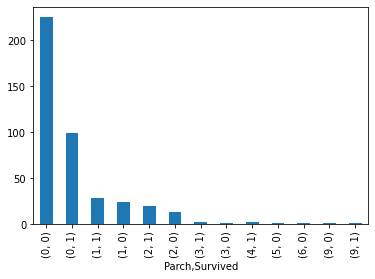

In [36]:
print("The Survived columns is relation to Parch columns so check the effect survived columns among pclass")
print(data.groupby("Parch")["Survived"].value_counts())
print("The survived people the given % is")
print(data.groupby("Parch")["Survived"].mean()*100)
data.groupby("Parch")["Survived"].value_counts().plot(kind="bar")
plt.show()

In [37]:
print("""The SibSp columns and Parch columns are relative person so new columns generate help of sibsp
        and parch columns add """)
data["Relative"]=data["SibSp"]+data["Parch"]

The SibSp columns and Parch columns are relative person so new columns generate help of sibsp
        and parch columns add 


In [38]:
print("The new columns relative with help of sibsp and parch columns no use two columns sibsp and parch so drop")
data.drop(columns=["SibSp","Parch"],axis=1,inplace=True)

The new columns relative with help of sibsp and parch columns no use two columns sibsp and parch so drop


In [39]:
print("The relative person survived % is")
data.groupby("Relative")["Survived"].mean()*100

The relative person survived % is


Relative
0     26.877470
1     48.648649
2     52.631579
3     71.428571
4     28.571429
5     66.666667
6     25.000000
7     50.000000
10    50.000000
Name: Survived, dtype: float64

In [40]:
print("The see relative columns and category the family so new columns generate family")
def fan(num):
    if num==0:
        return "single"
    elif num>0 and num<5:
        return "medium"
    else:
        return "large"

The see relative columns and category the family so new columns generate family


In [41]:
data["Family"]=data["Relative"].apply(fan)

In [42]:
print("The new columns family with help of relative columns no use columns relative so drop")
data.drop(columns=["Relative"],axis=1,inplace=True)

The new columns family with help of relative columns no use columns relative so drop


In [43]:
print("""The given columns Survived is no relation with Ticket no effect the Survived so 
      the drop the Ticket columns""")
data.drop(["Ticket"],axis=1,inplace=True)

The given columns Survived is no relation with Ticket no effect the Survived so 
      the drop the Ticket columns


The Survived columns is relation to Fare columns so check the effect survived columns among Fare.
Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object
The first graph show not survived or 2nd graph show survived.


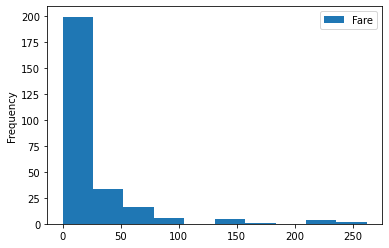

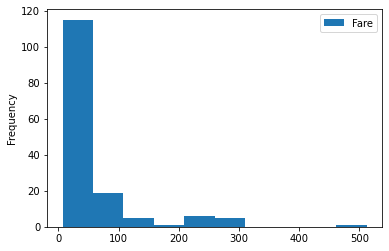

In [47]:
print("The Survived columns is relation to Fare columns so check the effect survived columns among Fare.")
print(data.groupby("Survived").plot(kind="hist",y="Fare"))
print("The first graph show not survived or 2nd graph show survived.")

/Users/ahsan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ahsan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


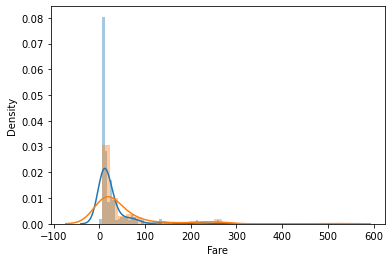

In [49]:
sns.distplot(data["Fare"][data["Survived"]==0])
sns.distplot(data["Fare"][data["Survived"]==1])
plt.show()

In [51]:
print("""These columns pclass,sex,embarked,family are category or categorical values machine learnin model
        not except so change the categorical value to numeric so easy learn machine learning model help 
        the pandas libraray function get_dummies""")
data_get=pd.get_dummies(data, columns=["Pclass","Sex","Embarked","Family"],drop_first=True)

These columns pclass,sex,embarked,family are category or categorical values machine learnin model
        not except so change the categorical value to numeric so easy learn machine learning model help 
        the pandas libraray function get_dummies


In [55]:
data_get.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_medium,Family_single
0,0,34.5,7.8292,0,1,1,1,0,0,1
1,1,47.0,7.0000,0,1,0,0,1,1,0
2,0,62.0,9.6875,1,0,1,1,0,0,1
3,0,27.0,8.6625,0,1,1,0,1,0,1
4,1,22.0,12.2875,0,1,0,0,1,1,0


# Catagorized

In [58]:
x=data_get.iloc[:,1:].values
y=data_get.iloc[:,0].values

# Split the data

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# create a model

In [61]:
from sklearn.tree import DecisionTreeClassifier
Decision=DecisionTreeClassifier()   

In [62]:
Decision.fit(x_train,y_train)

DecisionTreeClassifier()

# Predict

In [68]:
y_pred=Decision.predict(x_test)

# The Predicted and Actual Values

In [69]:
data_df=pd.DataFrame({"Actual":y_test,"predict":y_pred})

In [70]:
data_df

,Actual,predict
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
79,1,1
80,0,0
81,0,0
82,0,0


# Model has 100% accuracy

In [75]:
from sklearn.metrics import accuracy_score
print("accuracy",accuracy_score(y_pred,y_test)*100)

accuracy 100.0


# 📝 **Title**: Titanic - Data Analysis and Prediction

### 📂 **Purpose**:

The notebook appears to focus on analyzing Titanic passenger data and preparing it for machine learning modeling, likely to predict survival outcomes.

---

### 📊 **Structure Overview**:

1. **Data Loading & Libraries**:

   * Uses `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.
   * Loads a dataset from `tested.csv`.

2. **Data Preprocessing**:

   * Multiple markdown explanations and code cells guide through data inspection and cleanup.
   * Steps include:

     * Checking for missing values.
     * Handling missing data (e.g., dropping or imputing).
     * Data transformation or encoding might be included later in the notebook.

3. **Exploratory Data Analysis (EDA)**:

   * Visualizations likely made using `seaborn` and `matplotlib`.
   * Analyzes feature relationships such as survival rates by gender, class, etc.

4. **Modeling (if present)**:

   * Not confirmed yet — will check for machine learning model cells (e.g., Logistic Regression, Decision Tree).

---

### 🔍 Observations:

* **Good Use of Markdown**: Explanations are provided before key code blocks.
* **Spelling Errors**: Some markdown contains typos (e.g., *"funsion"* instead of *"function"*).
* **Dataset Assumption**: Uses a file `tested.csv`, which was not included in your upload. This could prevent full reproducibility.

---

### ✅ Recommendations:

1. **Fix Typos in Markdown** for clarity and polish.
2. **Include the Dataset or Use Kaggle Link** if sharing.
3. **Add Conclusions** summarizing findings and model performance (if applicable).
4. **Add Model Evaluation** if ML is involved (accuracy, confusion matrix, etc.).

---
                    
                                  *** End ***